In [1]:
import tweepy

In [2]:
from accesskeys import mytokens
access_tokens = mytokens.access_token
access_secret = mytokens.access_secret
consumer_key = mytokens.consumer_key
consumer_secret = mytokens.consumer_secret

In [3]:
# setup access to api
def connect_to_twitter():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_tokens, access_secret)
    api = tweepy.API(auth)
    return api

In [4]:
# connect to api object
api = connect_to_twitter()

In [5]:
tweets = api.user_timeline('AmitShah', page = 10, count = 200)


In [6]:
for tweet in tweets:
    print(tweet.text)

Have a look at these pictures from a public meeting in Morigaon, Assam. https://t.co/3Wv7y1P6Qb
Fine example of arrogance and delusion! 

Now he sees the entire humankind as full of hate, except himself of cours… https://t.co/Aa1Ekxa7qh
RT @BJP4India: Shri @AmitShah addresses public meeting in Morigaon, Assam. #ModiLaoDeshBanao https://t.co/7ARQaAKDxw
Addressed a public meeting in Thoubal, Manipur. https://t.co/vlH6WO1D3F
Modi government gave Rs 50,000 crore for the development of roads in Arunachal Pradesh. https://t.co/42zo7oNyMa
Narendra Modi government has connected all the 7 North eastern states by Railways. There has been an unprecedented… https://t.co/sTaEOG5tbN
It took 4 decades for a PM to attend the NEC meeting in North East. Morarji Desai was the last PM who attended NEC… https://t.co/rDOZkaj11Y
Five years ago, Corruption &amp; political instability has stalled North East’s Development. 

PM Narendra Modi’s govt… https://t.co/ZddggCYcT8
RT @BJP4India: LIVE: Shri @AmitShah ad

In [7]:
# this shows a whole json file of how the data has been stored
status = tweets[0]

In [9]:
# to see the proper representation of the json file
status._json

{'created_at': 'Fri Apr 05 13:12:50 +0000 2019',
 'id': 1114153926675259392,
 'id_str': '1114153926675259392',
 'text': 'Have a look at these pictures from a public meeting in Morigaon, Assam. https://t.co/3Wv7y1P6Qb',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1114153907268141056,
    'id_str': '1114153907268141056',
    'indices': [72, 95],
    'media_url': 'http://pbs.twimg.com/media/D3ZFE1vUwAA33fW.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/D3ZFE1vUwAA33fW.jpg',
    'url': 'https://t.co/3Wv7y1P6Qb',
    'display_url': 'pic.twitter.com/3Wv7y1P6Qb',
    'expanded_url': 'https://twitter.com/AmitShah/status/1114153926675259392/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 680, 'h': 453, 'resize': 'fit'},
     'large': {'w': 1920, 'h': 1280, 'resize': 'fit'},
     'medium': {'w': 1200, 'h': 800, 'resize': 'fit'}},
    'featur

In [10]:
# to just read text
status._json['text']

'Have a look at these pictures from a public meeting in Morigaon, Assam. https://t.co/3Wv7y1P6Qb'

In [11]:
# creating a data frame of varius essential details

In [12]:
import pandas as pd
#function to extract data from tweet object
def extract_tweet(tweet_object):
    # create empty list
    tweet_list = []
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        tweet_location = tweet.user.location
        tweet_coordinates  = tweet.coordinates
        created_at = tweet.created_at
        source = tweet.source
        reply_to_status = tweet.in_reply_to_status_id
        reply_to_user = tweet.in_reply_to_screen_name
        retweets = tweet.retweet_count
        favorites = tweet.favorite_count
        #append attributes to list
        tweet_list.append({'tweet_id':tweet_id,
                         'text' : text,
                         'tweet_location' : tweet_location,
                         'tweet_coordinates': tweet_coordinates,
                         'favourite_count' : favorite_count,
                         'retweet_count':retweet_count,
                         'created_at': created_at,
                         'source': source,
                         'reply_to_status': reply_to_status,
                         'reply_to_user':reply_to_user,
                         'retweets':retweets,
                         'favourites': favorites})
    df = pd.DataFrame(tweet_list)
    return df

In [13]:
df = extract_tweet(tweets)

In [14]:
df

,tweet_id,text,tweet_location,tweet_coordinates,favourite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favourites
0,1114153926675259392,Have a look at these pictures from a public me...,,None,5365,1509,2019-04-05 13:12:50,Twitter for iPhone,NaN,None,1509,5365
1,1114133576629374976,Fine example of arrogance and delusion! \n\nNo...,,None,15701,5424,2019-04-05 11:51:58,Twitter for iPhone,NaN,None,5424,15701
2,1114125441801932802,RT @BJP4India: Shri @AmitShah addresses public...,,None,0,814,2019-04-05 11:19:39,Twitter for iPhone,NaN,None,814,0
3,1114108779006763010,"Addressed a public meeting in Thoubal, Manipur...",,None,2400,803,2019-04-05 10:13:26,Twitter for iPhone,NaN,None,803,2400
4,1114098910946050048,"Modi government gave Rs 50,000 crore for the d...",,None,3882,1227,2019-04-05 09:34:13,Twitter Media Studio,NaN,None,1227,3882
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1108212552452972546,RT @narendramodi: The biggest casualty of dyna...,,None,0,9954,2019-03-20 03:43:56,Twitter for iPhone,NaN,None,9954,0
196,1108212540616728577,RT @narendramodi: वंशवाद की राजनीति से सबसे अध...,,None,0,15696,2019-03-20 03:43:53,Twitter for iPhone,NaN,None,15696,0
197,1108057490737061888,BJP Central Election committee meeting at BJP ...,,None,13110,2422,2019-03-19 17:27:47,Twitter for iPhone,NaN,None,2422,13110
198,1107993637651021824,RT @arunjaitley: Agenda 2019 – Part - 9 : The ...,,None,0,2335,2019-03-19 13:14:03,Twitter for iPhone,NaN,None,2335,0


## world cloud of tweets


In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
stopwords = set(STOPWORDS)

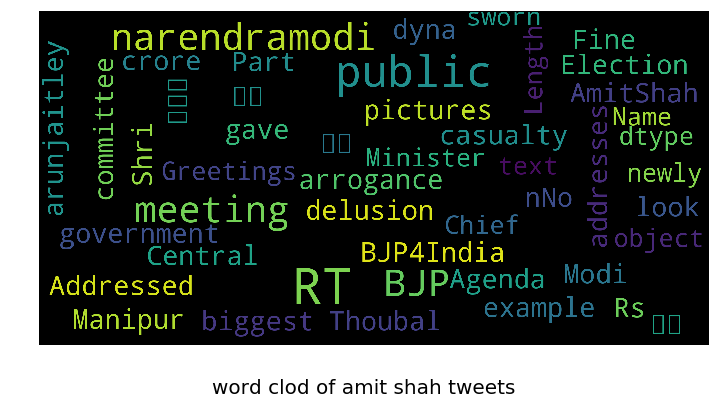

In [17]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords,
    max_words = 500,
    max_font_size = 30,
    scale = 5,
    random_state = 1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize = (12,12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['text'], 'word clod of amit shah tweets')

In [18]:
import re
def find_twitterhandles(strtweet):
    x = re.findall(r'@(\w+)', strtweet)
    x = ''.join(x)
    return x

def find_hashtags(strtweet):
    y = re.findall(r'#(\w+)', strtweet)
    y = ''.join(y)
    return y
df['twitterhandles'] = df['text'].apply(lambda x:find_twitterhandles(x))
df['hashtags'] = df['text'].apply(lambda x:find_hashtags(x))
df.head(200)

,tweet_id,text,tweet_location,tweet_coordinates,favourite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favourites,twitterhandles,hashtags
0,1114153926675259392,Have a look at these pictures from a public me...,,None,5365,1509,2019-04-05 13:12:50,Twitter for iPhone,NaN,None,1509,5365,,
1,1114133576629374976,Fine example of arrogance and delusion! \n\nNo...,,None,15701,5424,2019-04-05 11:51:58,Twitter for iPhone,NaN,None,5424,15701,,
2,1114125441801932802,RT @BJP4India: Shri @AmitShah addresses public...,,None,0,814,2019-04-05 11:19:39,Twitter for iPhone,NaN,None,814,0,BJP4IndiaAmitShah,ModiLaoDeshBanao
3,1114108779006763010,"Addressed a public meeting in Thoubal, Manipur...",,None,2400,803,2019-04-05 10:13:26,Twitter for iPhone,NaN,None,803,2400,,
4,1114098910946050048,"Modi government gave Rs 50,000 crore for the d...",,None,3882,1227,2019-04-05 09:34:13,Twitter Media Studio,NaN,None,1227,3882,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1108212552452972546,RT @narendramodi: The biggest casualty of dyna...,,None,0,9954,2019-03-20 03:43:56,Twitter for iPhone,NaN,None,9954,0,narendramodi,
196,1108212540616728577,RT @narendramodi: वंशवाद की राजनीति से सबसे अध...,,None,0,15696,2019-03-20 03:43:53,Twitter for iPhone,NaN,None,15696,0,narendramodi,
197,1108057490737061888,BJP Central Election committee meeting at BJP ...,,None,13110,2422,2019-03-19 17:27:47,Twitter for iPhone,NaN,None,2422,13110,,
198,1107993637651021824,RT @arunjaitley: Agenda 2019 – Part - 9 : The ...,,None,0,2335,2019-03-19 13:14:03,Twitter for iPhone,NaN,None,2335,0,arunjaitley,


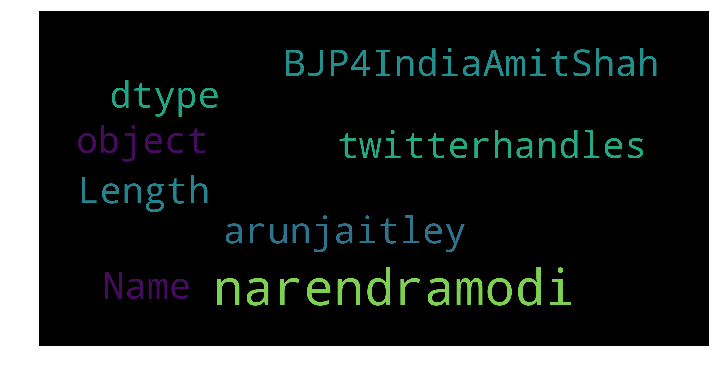

In [19]:
show_wordcloud(df['twitterhandles'])

## removing user handles

In [20]:
df['tidy_tweet'] = df['text'].replace(to_replace = '(@[\w]+)', value = '', regex = True)
df['tidy_tweet'] = df['tidy_tweet'].replace(to_replace = ('RT'), value =  '', regex = True)
df['tidy_tweet']

0      Have a look at these pictures from a public me...
1      Fine example of arrogance and delusion! \n\nNo...
2       : Shri  addresses public meeting in Morigaon,...
3      Addressed a public meeting in Thoubal, Manipur...
4      Modi government gave Rs 50,000 crore for the d...
                             ...                        
195     : The biggest casualty of dynastic politics a...
196     : वंशवाद की राजनीति से सबसे अधिक नुकसान संस्थ...
197    BJP Central Election committee meeting at BJP ...
198     : Agenda 2019 – Part - 9 : The NDA Government...
199    Greetings to the newly sworn-in Chief Minister...
Name: tidy_tweet, Length: 200, dtype: object

## removing any links 

In [21]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))', '\0', regex = True)
df['tidy_tweet']

0      Have a look at these pictures from a public me...
1      Fine example of arrogance and delusion! \n\nNo...
2       : Shri  addresses public meeting in Morigaon,...
3      Addressed a public meeting in Thoubal, Manipur.  
4      Modi government gave Rs 50,000 crore for the d...
                             ...                        
195     : The biggest casualty of dynastic politics a...
196     : वंशवाद की राजनीति से सबसे अधिक नुकसान संस्थ...
197    BJP Central Election committee meeting at BJP ...
198     : Agenda 2019 – Part - 9 : The NDA Government...
199    Greetings to the newly sworn-in Chief Minister...
Name: tidy_tweet, Length: 200, dtype: object

## removing special characters , numbers and punctuations

In [22]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace('[^a-zA-Z]+', " ")

In [23]:
df['tidy_tweet']

0      Have a look at these pictures from a public me...
1      Fine example of arrogance and delusion Now he ...
2       Shri addresses public meeting in Morigaon Ass...
3         Addressed a public meeting in Thoubal Manipur 
4      Modi government gave Rs crore for the developm...
                             ...                        
195     The biggest casualty of dynastic politics are...
196                                                     
197    BJP Central Election committee meeting at BJP ...
198     Agenda Part The NDA Government s Economy Repo...
199    Greetings to the newly sworn in Chief Minister...
Name: tidy_tweet, Length: 200, dtype: object

## tokenising and removing stopwords

In [24]:
df['tidy_tweet'] = df['tidy_tweet'].str.lower()
df['tidy_tweet'] = df['tidy_tweet'].str.split()
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [25]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])
df['tidy_tweet']

0      [look, pictures, public, meeting, morigaon, as...
1      [fine, example, arrogance, delusion, sees, ent...
2      [shri, addresses, public, meeting, morigaon, a...
3         [addressed, public, meeting, thoubal, manipur]
4      [modi, government, gave, rs, crore, developmen...
                             ...                        
195    [biggest, casualty, dynastic, politics, instit...
196                                                   []
197    [bjp, central, election, committee, meeting, b...
198    [agenda, part, nda, government, economy, repor...
199    [greetings, newly, sworn, chief, minister, goa...
Name: tidy_tweet, Length: 200, dtype: object

In [26]:
def rejoin_words(row):
    mylist = row['tidy_tweet']
    joined_words = ( ' '.join(mylist))
    return joined_words

df['tidy_tweet'] = df.apply(rejoin_words, axis = 1)

In [27]:
df['to']

0            look pictures public meeting morigaon assam
1      fine example arrogance delusion sees entire hu...
2      shri addresses public meeting morigaon assam m...
3               addressed public meeting thoubal manipur
4      modi government gave rs crore development road...
                             ...                        
195    biggest casualty dynastic politics institution...
196                                                     
197    bjp central election committee meeting bjp hq ...
198    agenda part nda government economy report card...
199    greetings newly sworn chief minister goa dr pr...
Name: tidy_tweet, Length: 200, dtype: object

## Applying Lemmatization

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\uru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['tidy_tweet'] = df['tidy_tweet'].apply(lemmatize_text)

In [30]:
df['tidy_tweet']

0      [look, picture, public, meeting, morigaon, assam]
1      [fine, example, arrogance, delusion, see, enti...
2      [shri, address, public, meeting, morigaon, ass...
3         [addressed, public, meeting, thoubal, manipur]
4      [modi, government, gave, r, crore, development...
                             ...                        
195    [biggest, casualty, dynastic, politics, instit...
196                                                   []
197    [bjp, central, election, committee, meeting, b...
198    [agenda, part, nda, government, economy, repor...
199    [greeting, newly, sworn, chief, minister, goa,...
Name: tidy_tweet, Length: 200, dtype: object

In [31]:
df['tidy_tweet'] = df.apply(rejoin_words, axis = 1)

In [33]:
df.isnull().sum()

tweet_id               0
text                   0
tweet_location         0
tweet_coordinates    200
favourite_count        0
retweet_count          0
created_at             0
source                 0
reply_to_status      198
reply_to_user        198
retweets               0
favourites             0
twitterhandles         0
hashtags               0
tidy_tweet             0
dtype: int64

## check the sentiments using TextBlob

In [34]:
from textblob import TextBlob

In [35]:
df[['polarity', 'subjectivity']] = df['tidy_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment ))  
df[['tidy_tweet', 'polarity','subjectivity']]

,tidy_tweet,polarity,subjectivity
0,look picture public meeting morigaon assam,0.000000,0.066667
1,fine example arrogance delusion see entire hum...,-0.008333,0.643750
2,shri address public meeting morigaon assam mod...,0.000000,0.066667
3,addressed public meeting thoubal manipur,0.000000,0.066667
4,modi government gave r crore development road ...,0.000000,0.000000
...,...,...,...
195,biggest casualty dynastic politics institution...,0.400000,0.800000
196,,0.000000,0.000000
197,bjp central election committee meeting bjp hq ...,0.068182,0.352273
198,agenda part nda government economy report card...,0.000000,0.000000


In [89]:
def sent_word(polarity_score):
    if polarity_score > 0:
        x = 'pos'
    elif polarity_score < 0:
        x = 'neg'
    elif polarity_score == 0:
        x = 'neutral'
    else:
        print('provide polarity_score')
    
    return x

In [91]:
TextBlob('I am :( today').sentiment

Sentiment(polarity=-0.75, subjectivity=1.0)

In [37]:
df['sentiment_textblob'] = df['polarity'].apply(lambda x: sent_word(x))

In [39]:
sent_score = df['sentiment_textblob'].value_counts()

In [40]:
sent_score

neutral    146
pos         43
neg         11
Name: sentiment_textblob, dtype: int64

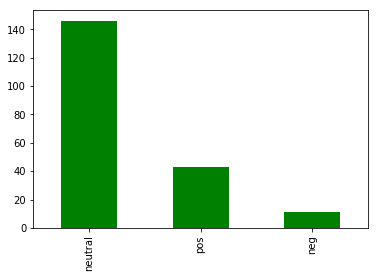

In [43]:
fig, ax = plt.subplots()
sent_score.plot(ax = ax, kind = 'bar', color = 'green')

# sentiment analysis using { vader }

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [46]:
analyser = SentimentIntensityAnalyzer()

In [50]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print('{:-<40} {}'.format(sentence, str(score)))

## lets check how vader performs on a particular review

In [52]:
sentiment_analyzer_scores('The phone is super  cool.')

The phone is super  cool.--------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


### puntuation increses the intensity of sentiment

In [54]:
print(sentiment_analyzer_scores('The food here is good'))
print(sentiment_analyzer_scores('The food here is good!'))
print(sentiment_analyzer_scores('The food here is good!!'))
print(sentiment_analyzer_scores('The food here is good!!!'))

The food here is good------------------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
None
The food here is good!------------------ {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}
None
The food here is good!!----------------- {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5399}
None
The food here is good!!!---------------- {'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.5826}
None


### see how capitalizing increases the score

In [56]:
print(sentiment_analyzer_scores('The food here is great!'))
print(sentiment_analyzer_scores('The food here is GREAT'))

The food here is great!----------------- {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6588}
None
The food here is GREAT------------------ {'neg': 0.0, 'neu': 0.453, 'pos': 0.547, 'compound': 0.7034}
None


### see how the degree of a verb increase its intensity

In [62]:
print(sentiment_analyzer_scores('The service here is good'))
print(sentiment_analyzer_scores('The service here is extremely good'))
print(sentiment_analyzer_scores('The service here is marginally good'))

The service here is good---------------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
None
The service here is extremely good------ {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}
None
The service here is marginally good----- {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}
None


### handling emojis and slangs

In [64]:
print(sentiment_analyzer_scores('I am :) today'))
print(sentiment_analyzer_scores('I am :( today'))

I am :) today--------------------------- {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
None
I am :( today--------------------------- {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}
None


In [88]:
print(sentiment_analyzer_scores('I am :( today'))

I am :( today--------------------------- {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}
None


In [125]:
def sent_analysis(pos,neg, neu):
    if (pos > neg) | (pos > neu):
        return str(pos* 100) + '% positive'
    elif neg > 0:
        return str(neg*100) + '% negative'
    else:
        return str(neu*100)+ '% neutral'

In [126]:
li = []
for item in df['tidy_tweet']:
    polar = analyser.polarity_scores(item)
    pos = polar['pos']
    neg = polar['neg']
    neu = polar['neu']
    li.append(sent_analysis(pos, neg, neu))
df['sentiment_vader'] = li

In [127]:
df[['tidy_tweet','sentiment_textblob', 'sentiment_vader']].head(10)

,tidy_tweet,sentiment_textblob,sentiment_vader
0,look picture public meeting morigaon assam,neutral,100.0% neutral
1,fine example arrogance delusion see entire hum...,neg,42.0% negative
2,shri address public meeting morigaon assam mod...,neutral,100.0% neutral
3,addressed public meeting thoubal manipur,neutral,100.0% neutral
4,modi government gave r crore development road ...,neutral,100.0% neutral
5,narendra modi government connected north easte...,pos,100.0% neutral
6,took decade pm attend nec meeting north east m...,neutral,100.0% neutral
7,five year ago corruption amp political instabi...,neutral,11.4% negative
8,live shri address public meeting thoubal manip...,pos,100.0% neutral
9,thank people arunachal pradesh massive support...,neutral,36.6% positive
